<a href="https://colab.research.google.com/github/sdd261/Machine_Learning/blob/main/Support-Vector-Machines-SVM/Kernel-Trick-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

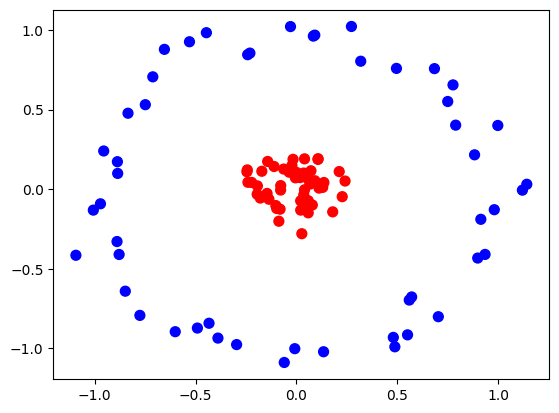

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [5]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
#we have non linear data here that is we get low accuracy

0.5

In [7]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

<ipython-input-7-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


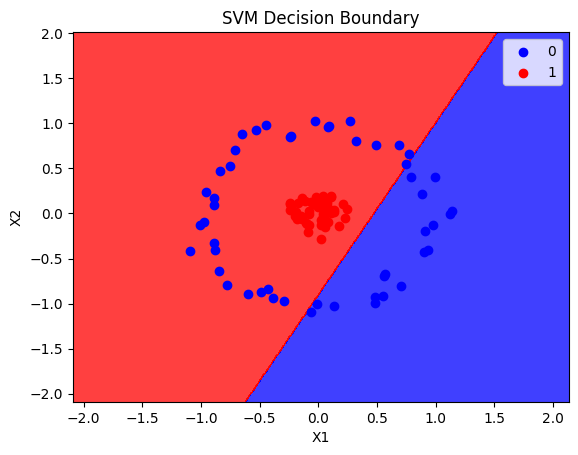

In [8]:
plot_decision_boundary(X, y, classifier)


In [9]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

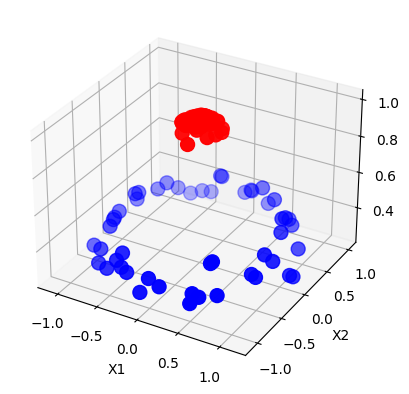

In [10]:
plot_3d_plot(X,y)


In [11]:
#using rbf
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)
#using rbf accuracy score is incerase


1.0

<ipython-input-7-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


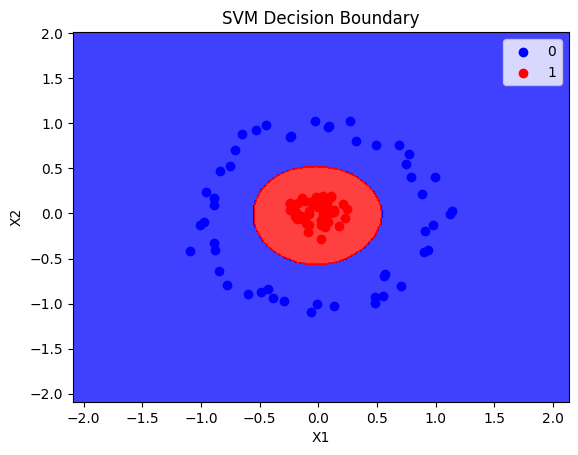

In [13]:
plot_decision_boundary(X, y, rbf_classifier)


In [14]:
#using polynomial
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)


1.0

<ipython-input-7-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


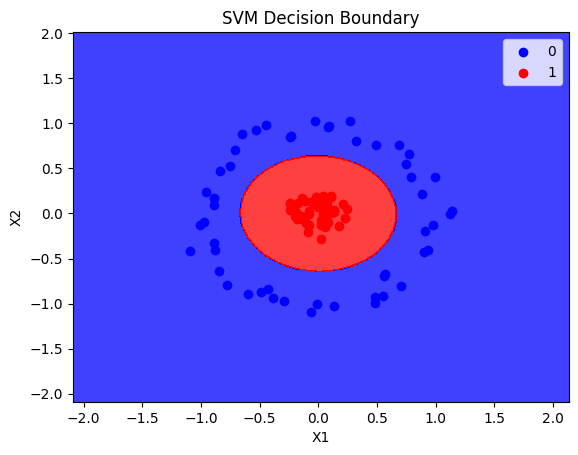

In [16]:
plot_decision_boundary(X, y, poly_classifier)


In [17]:
X

array([[ 0.27262044,  1.02134642],
       [-0.88710408,  0.17248953],
       [ 0.21210232,  0.11048163],
       [-0.19454876, -0.03194101],
       [ 0.98050806, -0.12896886],
       [ 0.749863  ,  0.55040871],
       [ 0.77598634,  0.65465272],
       [-0.24334822,  0.12096133],
       [-0.0049793 ,  0.07124676],
       [-0.44613446,  0.9823501 ],
       [-1.00637775, -0.13152256],
       [-0.07825616, -0.00558241],
       [-0.38885026, -0.9349713 ],
       [ 0.9979953 ,  0.3999217 ],
       [-0.06280818,  0.12620203],
       [ 0.22703129, -0.04720522],
       [ 0.57107543, -0.67663541],
       [ 0.02682505, -0.27970345],
       [ 0.04027957,  0.19036349],
       [-0.29632886, -0.97569302],
       [ 0.01804014,  0.07266876],
       [-0.08697185, -0.20128304],
       [ 0.49576321,  0.75821487],
       [ 0.11203826,  0.00675119],
       [ 0.05851627, -0.14871028],
       [ 1.11990702, -0.0062347 ],
       [ 0.0212783 , -0.1314294 ],
       [ 0.05367589,  0.06823852],
       [-0.95486403,

In [18]:
np.exp(-(X**2)).sum(1)


array([1.28071637, 1.42591509, 1.94387753, 1.9618384 , 1.36586332,
       1.30853612, 1.1990702 , 1.92797582, 1.99491197, 1.20049916,
       1.34605255, 1.99386352, 1.27687946, 1.22155306, 1.98026211,
       1.94753676, 1.35436497, 1.92402867, 1.96278936, 1.3019114 ,
       1.99440778, 1.95275933, 1.34486025, 1.98748031, 1.97470969,
       1.28526749, 1.98242199, 1.99247737, 1.34597374, 1.25353781,
       1.9776293 , 1.99345634, 1.95259791, 1.98158699, 1.41326108,
       1.99837775, 1.1903204 , 1.27066387, 1.17168758, 1.11462176,
       1.38108525, 1.97986044, 1.94809299, 1.99444839, 1.98301809,
       1.96523939, 1.36681875, 1.97834166, 1.97758554, 1.3512108 ,
       1.94093118, 1.17982624, 1.38725164, 1.27553135, 1.98397999,
       1.94207467, 1.32562198, 1.16377599, 1.95021864, 1.15073669,
       1.96286979, 1.30249215, 1.92969601, 1.98738547, 1.3986522 ,
       1.29503284, 1.26281136, 1.21075678, 1.14476132, 1.95012604,
       1.1462626 , 1.95436517, 1.33486824, 1.95847501, 1.99142

In [19]:
X_new=np.exp(-(X**2))


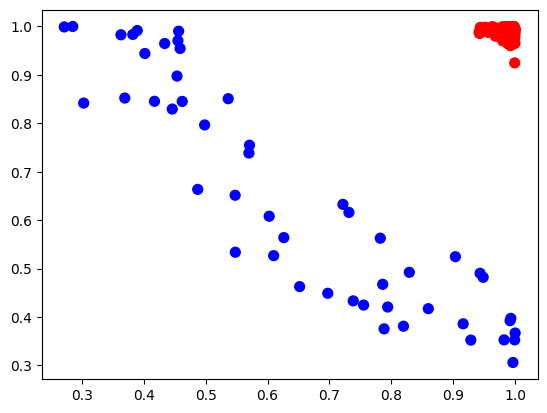

In [20]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')
#2D plot
